# 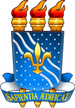
## Universidade Federal da Paraíba
#### Centro de Informática
#### Disciplina: Aprendizado Profundo
#### Docente: Tiago Maritan Ugulino de Araujo
#### Discentes:
#### - Gabriel de Lucca Vieira
#### - Ruy de Morais e Silva

##### 20 de Agosto de 2024

# 1ª Lista de Exercícios - 2024.1

## Imports

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
import xgboost as xgb
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import random
import numpy as np
import pandas as pd

## Setups

### Early Stopping
#### $Monitor= Val\; Loss$
#### $Patience = 500\; epochs$
#### $\Delta_{min} = 10^{-4}$

In [ ]:
# Configurando o Early Stopping
early_stop = EarlyStopping(
    monitor='val_loss',   # Métrica a ser monitorada (neste caso, a perda no conjunto de validação)
    min_delta=1e-4,       # Tolerância para a melhoria
    patience=500,        # Paciencia alta para garantir que o treinamento não pare cedo
    verbose=1,            # Mostra mensagem quando o treinamento é interrompido
    restore_best_weights=False  # Restaura os pesos do modelo com a melhor métrica de validação
)

### Min Max Scaler
#### $X_{Scaled} = \frac{X\; -\; X_{Min}}{X_{Max}\; -\; X_{Min}}$

In [ ]:
# Para a normalização os dados de treino e validação
scaler = MinMaxScaler()

## $1)$ Implemente uma rede perceptron de múltiplas camadas e utilize-a para aproximar as funções abaixo.

## Para cada mapeamento, estabeleça dois conjuntos de dados, um para o treinamento e outro para o teste. Nesse conjunto, cada amostra deve ser representada da seguinte forma: $x$ é a entrada e $f(x)$ é a saída desejada - rótulo. Essas amostras devem ser divididas em, pelo menos, dois conjuntos: treinamento e validação. Treine um perceptron de múltiplas camadas para que ele aprenda a aproximar a função a partir do conjunto de treinamento, e vá testando com o conjunto de validação.

## Em seguida, compare os resultados com as curvas exatas. Apresente também a curva do erro médio de treinamento com relação ao número de épocas e a curva do erro médio com o conjunto de validação.

### $a)$ $f(x) = exp(-x),\; onde\; 1 \leq x \leq 10$

In [ ]:
def func_1_a(x):
    return np.exp(-x)

In [ ]:
# Definindo o intervalo de x
X = np.linspace(1, 10, 2000)  # 2000 pontos entre 1 e 10

# Calculando os valores de y para f(x) = exp(-x)
Y = func_1_a(X)

In [ ]:
# Separando 70% dos dados para treino e 30% para teste/validação
x_train, x_temp, y_train, y_temp = train_test_split(X, Y, test_size=0.3, random_state=42)

# Dos 30% restantes, separar metade para validação e metade para teste
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

# Reshape necessário para o modelo de rede neural, pois o TF espera um tensor 2D
x_train = x_train.reshape(-1, 1)
x_val = x_val.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)
print("x_train shape", x_train.shape)
print("x_val shape", x_val.shape)
print("x_test shape", x_test.shape)

x_train shape (1400, 1)
x_val shape (300, 1)
x_test shape (300, 1)


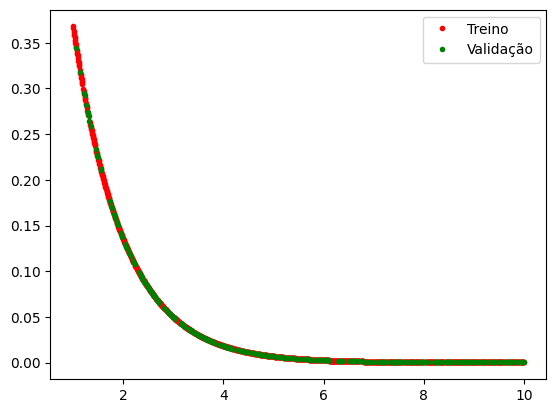

In [ ]:
plt.plot(x_train, y_train, 'r.', label='Treino')
plt.plot(x_val, y_val, 'g.', label='Validação')
plt.legend()
plt.show()

#### Teorema da aproximação universal: uma rede neural com uma única camada oculta e um número suficiente de neurônios pode aproximar qualquer função contínua em um intervalo fechado e limitado.

In [ ]:
# Definindo o modelo
model_1a = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(1,)),     # Camada de entrada
    tf.keras.layers.Dense(100, activation='relu'),    # Camada oculta com 100 neurônios e ReLU
    tf.keras.layers.Dense(1)                          # Camada de saída com 1 neurônio
])

# Escolhendo o otimizador Adam com uma learning rate de 0.01
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

# Compilando o modelo
model_1a.compile(optimizer=optimizer, loss='mse', metrics=['mse'])

# Resumo do modelo
model_1a.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 100)                 │             200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 301 (1.18 KB)

 Trainable params: 301 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Definindo o batch_size
batch_size = 32  # Escolha comum para redes neurais, mas pode ser ajustado conforme necessário

# Definindo o total de épocas
epochs = 2000

# Treinando o modelo
%time history = model_1a.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1, validation_data=(x_val, y_val), callbacks=[early_stop])

Epoch 1/2000
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1157 - mse: 0.1157 - val_loss: 0.0055 - val_mse: 0.0055
Epoch 2/2000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 3/2000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 4/2000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 5/2000
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 6/2000
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 7/2000
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 0.0020 - val_mse: 0.0020
Epoch 8/2000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0027 - mse: 0.0027 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 9/2000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - lo

In [ ]:
# Avaliando o modelo no conjunto de teste
loss, mse = model_1a.evaluate(x_test, y_test)
print(f"Test Loss: {loss}, Test MSE: {mse}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1413e-06 - mse: 1.1413e-06 
Test Loss: 1.2642248066185857e-06, Test MSE: 1.2642248066185857e-06


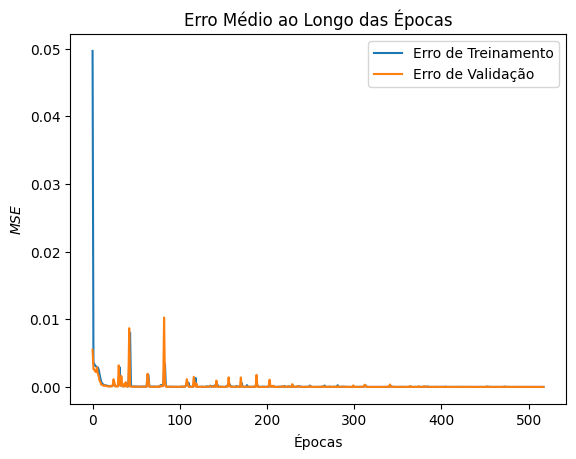

In [ ]:
#Plotando o erro de treino e validação
plt.plot(history.history['mse'], label='Erro de Treinamento')
plt.plot(history.history['val_mse'], label='Erro de Validação')
plt.title('Erro Médio ao Longo das Épocas')
plt.xlabel('Épocas')
plt.ylabel('$MSE$')
plt.legend()
plt.show()

In [ ]:
# Previsões no conjunto de teste
y_pred = model_1a.predict(x_test)
print(y_pred.shape)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
(300, 1)


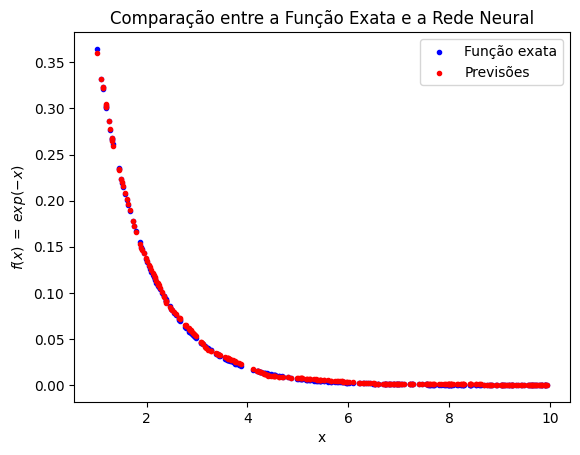

In [ ]:
# Plotando a função exata e as previsões do modelo
plt.scatter(x_test, y_test, label='Função exata', marker='.', color='b')
plt.scatter(x_test, y_pred, label='Previsões', marker='.', color='r')
plt.title('Comparação entre a Função Exata e a Rede Neural')

plt.xlabel('x')
plt.ylabel('$f(x)\; =\; exp(-x)$')
plt.legend()
plt.show()

#### Normlizando os dados

In [ ]:
# Normalizando os dados de treino e validação
x_train_norm = scaler.fit_transform(x_train)
x_val_norm = scaler.transform(x_val)
x_test_norm = scaler.transform(x_test)

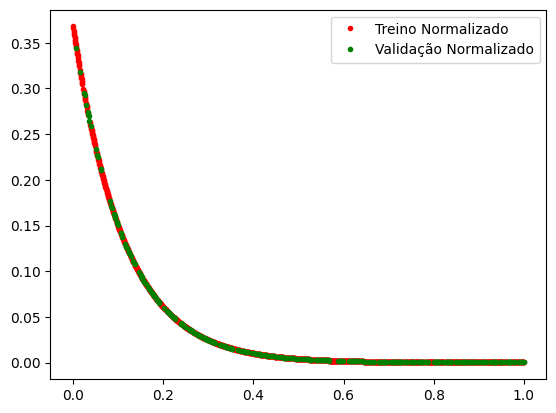

In [ ]:
# Gráfico do meu conjunto de treino e validação normalizado
plt.plot(x_train_norm, y_train, 'r.', label='Treino Normalizado')
plt.plot(x_val_norm, y_val, 'g.', label='Validação Normalizado')
plt.legend()
plt.show()

In [ ]:
# Definindo o model_1a normalizado
model_1a_norm = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(1,)),     # Camada de entrada
    tf.keras.layers.Dense(70, activation='relu'),    # Camada oculta com 100 neurônios e ReLU
    tf.keras.layers.Dense(1)                          # Camada de saída com 1 neurônio
])

# Escolhendo o otimizador Adam com uma learning rate de 0.01
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

# Compilando o modelo
model_1a_norm.compile(optimizer=optimizer, loss='mse', metrics=['mse'])

# Resumo do modelo
model_1a_norm.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 70)                  │             140 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              71 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 211 (844.00 B)

 Trainable params: 211 (844.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Definindo o batch_size
batch_size = 32  # Escolha comum para redes neurais, mas pode ser ajustado conforme necessário

# Definindo o total de épocas
epochs = 2000

# Treinando o modelo
%time history = model_1a_norm.fit(x_train_norm, y_train, epochs=epochs, batch_size=batch_size, verbose=1, validation_data=(x_val_norm, y_val), callbacks=[early_stop])

Epoch 1/2000
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0078 - mse: 0.0078 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 2/2000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 0.0020 - val_mse: 0.0020
Epoch 3/2000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 4/2000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 4.4333e-04 - val_mse: 4.4333e-04
Epoch 5/2000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.9933e-04 - mse: 5.9933e-04 - val_loss: 3.1910e-04 - val_mse: 3.1910e-04
Epoch 6/2000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.2113e-04 - mse: 5.2113e-04 - val_loss: 4.1353e-04 - val_mse: 4.1353e-04
Epoch 7/2000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.6671e-04 - mse: 3.6671e-04 - val_loss: 2.3529e-04 - val_mse: 2.3529e-04
Epoch 8/2000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3344e-04 - mse: 3.3344e-04 - val_loss: 1.7038e-04 - val_

In [ ]:
# Avaliando o modelo no conjunto de teste
loss, mse = model_1a_norm.evaluate(x_test_norm, y_test)
print(f"Test Loss: {loss}, Test MSE: {mse}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8000e-05 - mse: 1.8000e-05 
Test Loss: 1.8912067389464937e-05, Test MSE: 1.8912067389464937e-05


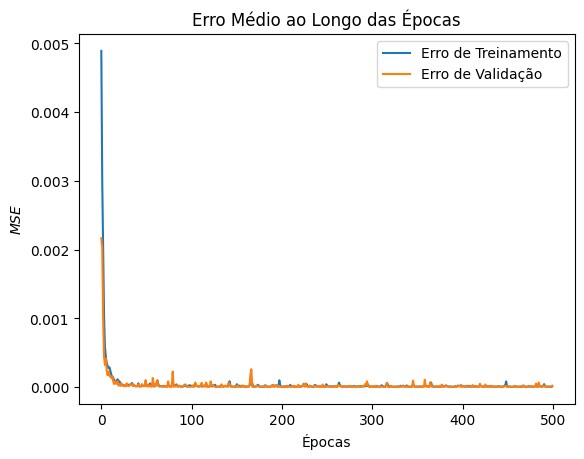

In [ ]:
#Plotando o erro de treino e validação
plt.plot(history.history['mse'], label='Erro de Treinamento')
plt.plot(history.history['val_mse'], label='Erro de Validação')
plt.title('Erro Médio ao Longo das Épocas')
plt.xlabel('Épocas')
plt.ylabel('$MSE$')
plt.legend()
plt.show()

In [ ]:
# Previsões no conjunto de teste
y_pred = model_1a_norm.predict(x_test_norm)
print(y_pred.shape)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
(300, 1)


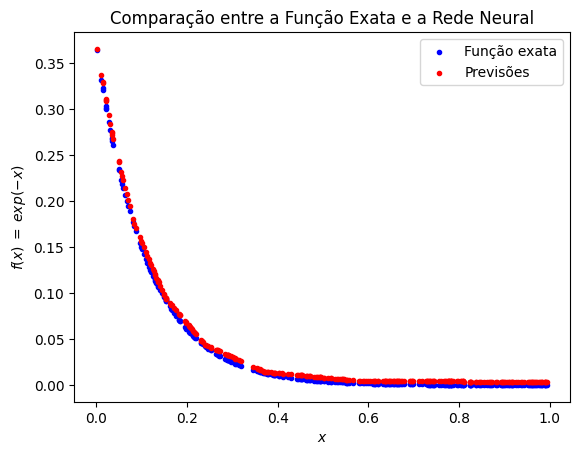

In [ ]:
# Plotando a função exata e as previsões do modelo
plt.scatter(x_test_norm, y_test, label='Função exata', marker='.', color='b')
plt.scatter(x_test_norm, y_pred, label='Previsões', marker='.', color='r')
plt.title('Comparação entre a Função Exata e a Rede Neural')

plt.xlabel('$x$')
plt.ylabel('$f(x)\; =\; exp(-x)$')
plt.legend()
plt.show()

### $b)$ $f(x) = log_{10}(x),\; onde\; 1 \leq x \leq 10$

In [ ]:
def func_1_b(x):
    return np.log10(x)

In [ ]:
# Definindo a malha de pontos para a função
X = np.linspace(1, 10, 2000)
Y = func_1_b(X)

In [ ]:
# Separando 70% dos dados para treino e 30% para teste/validação
x_train, x_temp, y_train, y_temp = train_test_split(X, Y, test_size=0.3, random_state=42)

# Dos 30% restantes, separar metade para validação e metade para teste
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
# Reshape necessário para o modelo de rede neural, pois o TF espera um tensor 2D
x_train = x_train.reshape(-1, 1)
x_val = x_val.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)
print("x_train shape", x_train.shape)
print("x_val shape", x_val.shape)
print("x_test shape", x_test.shape)

x_train shape (1400, 1)
x_val shape (300, 1)
x_test shape (300, 1)


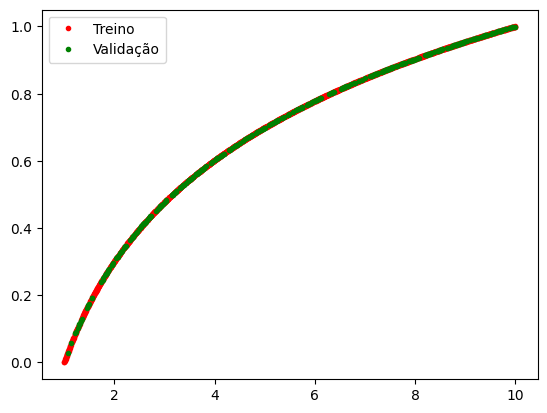

In [ ]:
# Plot dos dados de treino e validação
plt.plot(x_train, y_train, 'r.', label='Treino')
plt.plot(x_val, y_val, 'g.', label='Validação')
plt.legend()
plt.show()

In [ ]:
# Normalizando os dados de treino, validação e teste
x_train_norm = scaler.fit_transform(x_train)
x_val_norm = scaler.transform(x_val)
x_test_norm = scaler.transform(x_test)

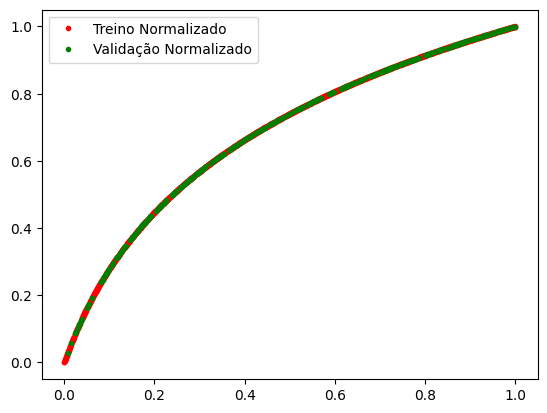

In [ ]:
# Gráfico do conjunto de treino e validação normalizado
plt.plot(x_train_norm, y_train, 'r.', label='Treino Normalizado')
plt.plot(x_val_norm, y_val, 'g.', label='Validação Normalizado')
plt.legend()
plt.show()

In [ ]:
# Definindo o model_1b

model_1b = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(1,)),          # Camada de entrada
    tf.keras.layers.Dense(75, activation='relu'),          # Camada oculta com 64 neurônios e ReLU
    tf.keras.layers.Dense(1)                               # Camada de saída com 1 neurônio
])

# Escolhendo o otimizador SGD com uma learning rate de 0.005 e momentum de 0.9
optimizer = tf.keras.optimizers.SGD(learning_rate=0.005, momentum=0.9)

# Compilando o model_1b
model_1b.compile(optimizer=optimizer, loss='mse', metrics=['mse'])

# Resumo do model_1b
model_1b.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 75)                  │             150 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              76 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 226 (904.00 B)

 Trainable params: 226 (904.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Definindo o batch_size
batch_size = 32  # Escolha comum para redes neurais, mas pode ser ajustado conforme necessário

# Definindo o total de épocas
epochs = 2000

# Treinando o modelo
%time history = model_1b.fit(x_train_norm, y_train, epochs=epochs, batch_size=batch_size, verbose=1, validation_data=(x_val_norm, y_val), callbacks=[early_stop])

Epoch 1/2000
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1272 - mse: 0.1272 - val_loss: 0.0058 - val_mse: 0.0058
Epoch 2/2000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0065 - mse: 0.0065 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 3/2000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 4/2000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 5/2000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0037 - mse: 0.0037 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 6/2000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 7/2000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0036 - mse: 0.0036 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 8/2000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0035 - mse: 0.0035 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 9/2000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - lo

In [ ]:
# Avaliando o modelo no conjunto de teste
loss, mse = model_1b.evaluate(x_test_norm, y_test)
print(f"Test Loss: {loss}, Test MSE: {mse}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.4345e-05 - mse: 5.4345e-05 
Test Loss: 5.4283198551274836e-05, Test MSE: 5.4283198551274836e-05


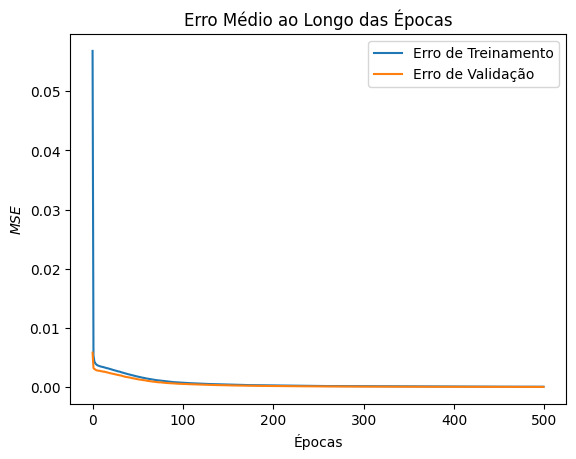

In [ ]:
# Plotando o erro de treino e validação
plt.plot(history.history['mse'], label='Erro de Treinamento')
plt.plot(history.history['val_mse'], label='Erro de Validação')
plt.title('Erro Médio ao Longo das Épocas')
plt.xlabel('Épocas')
plt.ylabel('$MSE$')
plt.legend()
plt.show()

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
(300, 1)


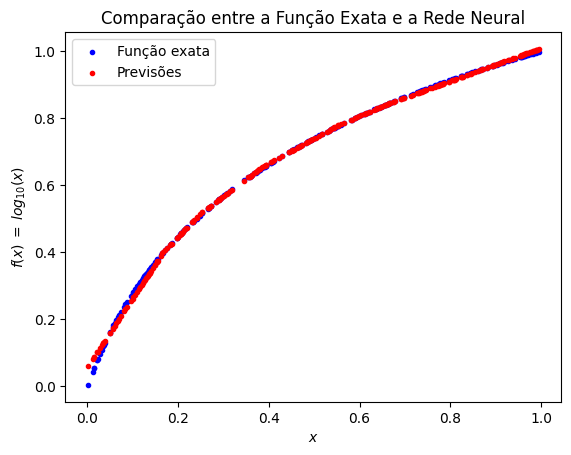

In [ ]:
# Previsões no conjunto de teste
y_pred = model_1b.predict(x_test_norm)
print(y_pred.shape)

# Plotando a função exata e as previsões do modelo
plt.scatter(x_test_norm, y_test, label='Função exata', marker='.', color='b')
plt.scatter(x_test_norm, y_pred, label='Previsões', marker='.', color='r')
plt.title('Comparação entre a Função Exata e a Rede Neural')

plt.xlabel('$x$')
plt.ylabel('$f(x)\; =\; log_{10}(x)$')
plt.legend()
plt.show()

### $c)\; f(x) = 10x^5 + 5x^4 + 2x^3 - 0.5x^2 + 3x + 2,\; onde\; 0 \leq x \leq 5$


In [ ]:
def func_1_c(x):
    return (10*x**5) + (5*x**4) + (2*x**3) + (0.5*x**2) + (3*x) + 2

In [ ]:
# Definindo a malha de 0 a 5
X = np.linspace(0, 5, 2000)
Y = func_1_c(X)

In [ ]:
# Separando 70% dos dados para treino e 30% para teste/validação
x_train, x_temp, y_train, y_temp = train_test_split(X, Y, test_size=0.3, random_state=42)

# Dos 30% restantes, separar metade para validação e metade para teste
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

# Reshape necessário para o modelo de rede neural, pois o TF espera um tensor 2D
x_train = x_train.reshape(-1, 1)
x_val = x_val.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)

print("x_train shape", x_train.shape)
print("x_val shape", x_val.shape)
print("x_test shape", x_test.shape)

x_train shape (1400, 1)
x_val shape (300, 1)
x_test shape (300, 1)


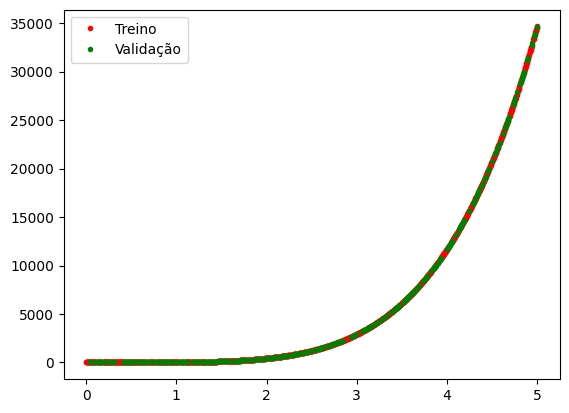

In [ ]:
# Plot dos dados de treino e validação
plt.plot(x_train, y_train, 'r.', label='Treino')
plt.plot(x_val, y_val, 'g.', label='Validação')
plt.legend()
plt.show()

In [ ]:
# Normalizando os dados de treino, validação e teste - neste caso iremos normalizar ambos os eixos, pois os valores  de y são muito altos
y_train_norm = scaler.fit_transform(y_train.reshape(-1, 1))
y_val_norm = scaler.transform(y_val.reshape(-1, 1))
y_test_norm = scaler.transform(y_test.reshape(-1, 1))

x_train_norm = scaler.fit_transform(x_train.reshape(-1, 1))
x_val_norm = scaler.transform(x_val.reshape(-1, 1))
x_test_norm = scaler.transform(x_test.reshape(-1, 1))

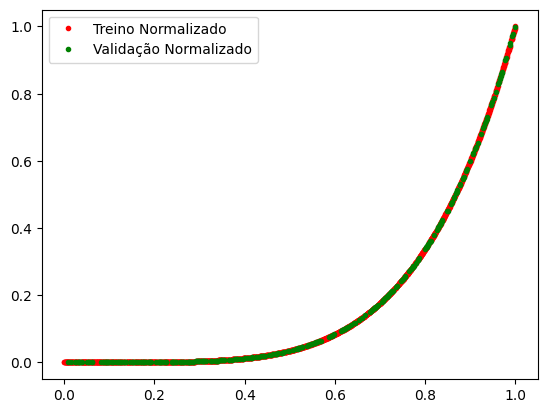

In [ ]:
# Gráfico do meu conjunto de treino e validação normalizado
plt.plot(x_train_norm, y_train_norm, 'r.', label='Treino Normalizado')
plt.plot(x_val_norm, y_val_norm, 'g.', label='Validação Normalizado')
plt.legend()
plt.show()

In [ ]:
# Definindo o model_1c

model_1c = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(1,)),          # Camada de entrada
    tf.keras.layers.Dense(50, activation='relu'),          # Camada oculta com 50 neurônios e ReLU
    tf.keras.layers.Dense(1)                               # Camada de saída com 1 neurônio
])

# Escolhendo o otimizador SGD com uma learning rate de 0.005 e momentum de 0.9
optimizer = tf.keras.optimizers.SGD(learning_rate=0.005, momentum=0.9)

# Compilando o model_1c
model_1c.compile(optimizer=optimizer, loss='mse', metrics=['mse'])

# Resumo do model_1c
model_1c.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 50)                  │             100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 151 (604.00 B)

 Trainable params: 151 (604.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Definindo o batch_size
batch_size = 32  # Escolha comum para redes neurais, mas pode ser ajustado conforme necessário

# Definindo o total de épocas
epochs = 2000

# Treinando o modelo
%time history = model_1c.fit(x_train_norm, y_train_norm, epochs=epochs, batch_size=batch_size, verbose=1, validation_data=(x_val_norm, y_val_norm), callbacks=[early_stop])

Epoch 1/2000
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0381 - mse: 0.0381 - val_loss: 0.0293 - val_mse: 0.0293
Epoch 2/2000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0257 - mse: 0.0257 - val_loss: 0.0222 - val_mse: 0.0222
Epoch 3/2000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0221 - mse: 0.0221 - val_loss: 0.0210 - val_mse: 0.0210
Epoch 4/2000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0191 - mse: 0.0191 - val_loss: 0.0176 - val_mse: 0.0176
Epoch 5/2000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0157 - val_mse: 0.0157
Epoch 6/2000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0143 - val_mse: 0.0143
Epoch 7/2000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0137 - mse: 0.0137 - val_loss: 0.0130 - val_mse: 0.0130
Epoch 8/2000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0122 - mse: 0.0122 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 9/2000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - lo

In [ ]:
# Avaliando o modelo no conjunto de teste
loss, mse = model_1c.evaluate(x_test_norm, y_test_norm)
print(f"Test Loss: {loss}, Test MSE: {mse}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2356e-05 - mse: 3.2356e-05 
Test Loss: 2.9197837648098357e-05, Test MSE: 2.9197837648098357e-05


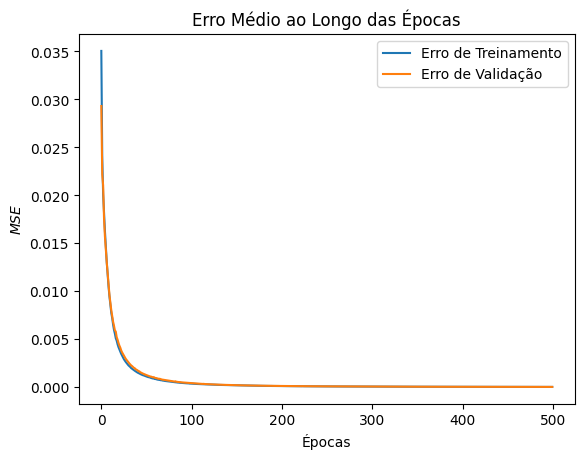

In [ ]:
# Plotando o erro de treino e validação
plt.plot(history.history['mse'], label='Erro de Treinamento')
plt.plot(history.history['val_mse'], label='Erro de Validação')
plt.title('Erro Médio ao Longo das Épocas')
plt.xlabel('Épocas')
plt.ylabel('$MSE$')
plt.legend()
plt.show()

In [ ]:
# Previsões no conjunto de teste
y_pred = model_1c.predict(x_test_norm)
print(y_pred.shape)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
(300, 1)


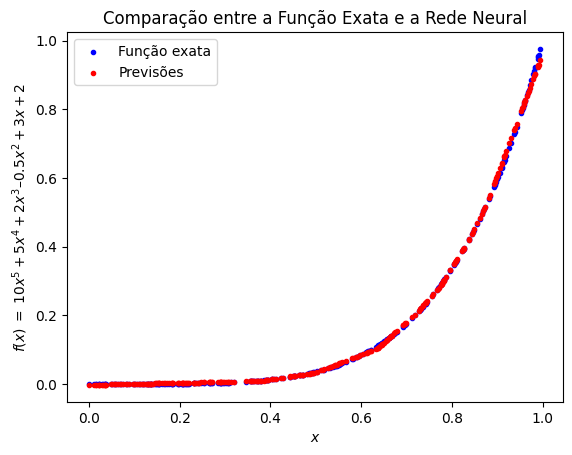

In [ ]:
# Plotando a função exata e as previsões do modelo
plt.scatter(x_test_norm, y_test_norm, label='Função exata', marker='.', color='b')
plt.scatter(x_test_norm, y_pred, label='Previsões', marker='.', color='r')
plt.title('Comparação entre a Função Exata e a Rede Neural')

plt.xlabel('$x$')
plt.ylabel('$f(x)\; =\; 10x^5 + 5x^4 + 2x^3 – 0.5x^2 + 3x + 2$')
plt.legend()
plt.show()

## $2)$ Considere um problema de classificação de padrões constituído de oito padrões. A distribuição dos padrões forma um círculo centrado na origem de raio unitário e contido no círculo um losango também centrado na origem e com lados iguais à raiz de $2$. Os dados das classes $C1,\; C2,\; C3,\; C4$ correspondem aos quatro setores do losango e as outras quatro classes correspondem aos setores delimitados pelo círculo e os lados do losango. Após gerar aleatoriamente dados que venham formar estas distribuições de dados, selecione um conjunto de treinamento e um conjunto de validação.

## **Treine duas redes perceptron (uma rede utilizando a regra delta convencional, e outra usando a regra delta com termo do momento), para classificar os padrões associados a cada uma das classes. Verifique o desempenho dos classificadores usando o conjunto de validação e calculando a matriz de confusão.**

### Delta convencional

In [ ]:
#Define a função para gerar pontos aleatórios dentro de um círculo
# Função para gerar pontos aleatórios dentro de um círculo
def pontos_dentro_do_circulo(k):
    pontos = []
    for i in range(k):
        angle = random.uniform(0, 2 * np.pi)
        r = np.sqrt(random.uniform(0, 1))  # Distribuição uniforme em área
        x = r * np.cos(angle)
        y = r * np.sin(angle)
        pontos.append((x, y))
    return pontos

# Função para calcular o y de um ponto na reta dada a entrada x
def calcular_y_do_ponto_da_reta(p1, p2, x):
    m = (p2[1] - p1[1]) / (p2[0] - p1[0])
    b = p1[1] - m * p1[0]
    return m * x + b

In [ ]:
# Gerar pontos aleatórios
n_ex = 5000  # Número de exemplos
pontos = pontos_dentro_do_circulo(n_ex)

# Círculo
theta = np.linspace(0, 2 * np.pi, 100)
x_circle = np.cos(theta)
y_circle = np.sin(theta)

# Desenha o losango
x_diamond = [0, 1, 0, -1, 0]
y_diamond = [1, 0, -1, 0, 1]

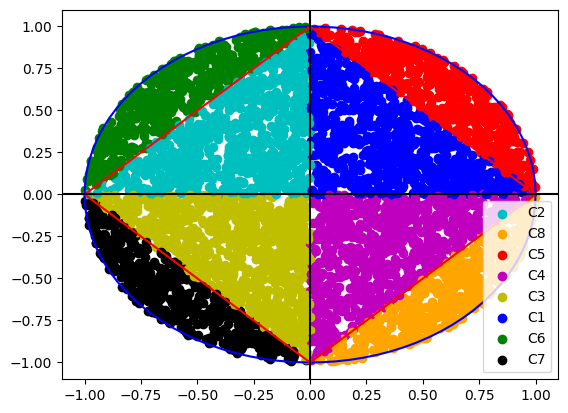

In [ ]:
# Dicionário para mapear classes para cores e labels
class_dict = {
    0: ('b', 'C1'),
    1: ('c', 'C2'),
    2: ('y', 'C3'),
    3: ('m', 'C4'),
    4: ('r', 'C5'),
    5: ('g', 'C6'),
    6: ('k', 'C7'),
    7: ('orange', 'C8')
}

# Inicializa um dicionário para rastrear se a legenda já foi adicionada
legend_added = {key: False for key in class_dict}
lista = []

# Classificação dos pontos e plotagem
for x, y in pontos:
    if x > 0 and y > 0 and y < calcular_y_do_ponto_da_reta((0,1),(1,0),x):
        class_idx = 0
        lista.append([1, 0, 0, 0, 0, 0, 0, 0])
    elif x < 0 and y > 0 and y < calcular_y_do_ponto_da_reta((0,1),(-1,0),x):
        class_idx = 1
        lista.append([0, 1, 0, 0, 0, 0, 0, 0])
    elif x < 0 and y < 0 and y > calcular_y_do_ponto_da_reta((0,-1),(-1,0),x):
        class_idx = 2
        lista.append([0, 0, 1, 0, 0, 0, 0, 0])
    elif x > 0 and y < 0 and y > calcular_y_do_ponto_da_reta((0,-1),(1,0),x):
        class_idx = 3
        lista.append([0, 0, 0, 1, 0, 0, 0, 0])
    elif x > 0 and y > 0 and y > calcular_y_do_ponto_da_reta((0,1),(1,0),x):
        class_idx = 4
        lista.append([0, 0, 0, 0, 1, 0, 0, 0])
    elif x < 0 and y > 0 and y > calcular_y_do_ponto_da_reta((0,1),(-1,0),x):
        class_idx = 5
        lista.append([0, 0, 0, 0, 0, 1, 0, 0])
    elif x < 0 and y < 0 and y < calcular_y_do_ponto_da_reta((0,-1),(-1,0),x):
        class_idx = 6
        lista.append([0, 0, 0, 0, 0, 0, 1, 0])
    elif x > 0 and y < 0 and y < calcular_y_do_ponto_da_reta((0,-1),(1,0),x):
        class_idx = 7
        lista.append([0, 0, 0, 0, 0, 0, 0, 1])

    # Obtém a cor e o label da classe
    color, label = class_dict[class_idx]

    # Plota o ponto e adiciona a legenda se ainda não foi adicionada
    if not legend_added[class_idx]:
        plt.scatter(x, y, color=color, label=label)
        legend_added[class_idx] = True
    else:
        plt.scatter(x, y, color=color)


# Desenha o círculo e o losango
plt.plot(x_circle, y_circle, 'b')
plt.plot(x_diamond, y_diamond, 'r')

plt.axvline(x=0, color='black')
plt.axhline(y=0, color='black')

# Exibe a legenda
plt.legend()
plt.show()

In [ ]:
X = np.array(pontos)
Y = np.array(lista)
print(X.shape)
print(Y.shape) # Já está com o one-hot encoding

(5000, 2)
(5000, 8)


- Não precisa normalizar porque o *range* ja está entre $[-1,\;1]$
- As categorias já estão com $One\; Hot\; Encoding.$

In [ ]:
# Separando os dados de treino, validação e teste
# Separando 70% dos dados para treino e 30% para teste/validação
x_train, x_temp, y_train, y_temp = train_test_split(X, Y, test_size=0.3, random_state=42)

# Dos 30% restantes, separar metade para validação e metade para teste
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
# Reshape necessário para o modelo de rede neural, pois o TF espera um tensor 2D
x_train = x_train.reshape(-1, 2)
x_val = x_val.reshape(-1, 2)
x_test = x_test.reshape(-1, 2)

print("x_train shape", x_train.shape)
print("x_val shape", x_val.shape)
print("x_test shape", x_test.shape)

x_train shape (3500, 2)
x_val shape (750, 2)
x_test shape (750, 2)


In [ ]:
print(x_train)

[[-0.03914457  0.95006113]
 [ 0.3641101   0.8634405 ]
 [ 0.80725396 -0.19931367]
 ...
 [-0.13351207  0.58545065]
 [-0.70063464 -0.51246777]
 [-0.41981697  0.35553494]]


In [ ]:
# Definindo o model_2a
model_2a = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(2,)),          # Camada de entrada
    tf.keras.layers.Dense(16, activation='relu'),          # Camada oculta com 16 neurônios e ReLU
    tf.keras.layers.Dense(8, activation='softmax')         # Camada de saída com 8 neurônios e Softmax
])

# Escolhendo o otimizador Adam com uma learning rate de 0.01
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

# Compilando o model_2a
model_2a.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Resumo do model_2a
model_2a.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 16)                  │              48 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 8)                   │             136 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 184 (736.00 B)

 Trainable params: 184 (736.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Definindo o batch_size
batch_size = 256  # Escolha comum para redes neurais, mas pode ser ajustado conforme necessário

epochs = 2000

# Treinando o model_2a
%time history = model_2a.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val, y_val))

Epoch 1/2000
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.0976 - loss: 2.1240 - val_accuracy: 0.1040 - val_loss: 2.1106
Epoch 2/2000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0988 - loss: 2.1123 - val_accuracy: 0.1053 - val_loss: 2.1000
Epoch 3/2000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1028 - loss: 2.1032 - val_accuracy: 0.1107 - val_loss: 2.0900
Epoch 4/2000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1060 - loss: 2.0924 - val_accuracy: 0.1240 - val_loss: 2.0806
Epoch 5/2000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1252 - loss: 2.0811 - val_accuracy: 0.1467 - val_loss: 2.0717
Epoch 6/2000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1411 - loss: 2.0708 - val_accuracy: 0.1560 - val_loss: 2.0631
Epoch 7/2000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1566 - loss: 2.0630 - val_accuracy: 0.1733 - val_loss: 2.0549
Epoch 8/2000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1950 - loss: 2.0525 - val_accuracy: 0

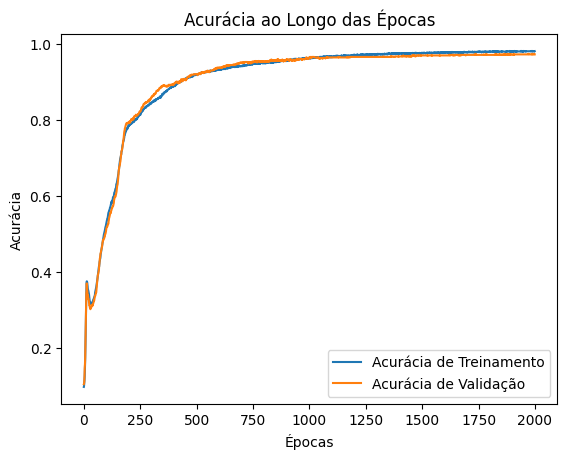

In [ ]:
# Plotando o erro de treino e validação
plt.plot(history.history['accuracy'], label='Acurácia de Treinamento')
plt.plot(history.history['val_accuracy'], label='Acurácia de Validação')
plt.title('Acurácia ao Longo das Épocas')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.show()

In [ ]:
# Avaliando o modelo no conjunto de teste
loss, accuracy = model_2a.evaluate(x_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9756 - loss: 0.2193 
Test Loss: 0.21614515781402588, Test Accuracy: 0.972000002861023


In [ ]:
def plot_decision_regions(X, y, model, resolution=0.02):
    # Definir o mapa de cores
    colors = ('blue', 'cyan', 'yellow', 'purple', 'red', 'green', 'black', 'orange')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # Preparar o grid para o gráfico
    x1_min, x1_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    x2_min, x2_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))

    # Fazer as previsões em todos os pontos do grid
    Z = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = np.argmax(Z, axis=1)  # Para escolher a classe com a maior probabilidade
    Z = Z.reshape(xx1.shape)

    # Aumentar o tamanho do gráfico
    plt.figure(figsize=(10, 8))  # Ajuste o tamanho conforme necessário

    # Plotar as regiões de decisão
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Plotar os pontos de treinamento com o mesmo marcador
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, marker='o', edgecolor='k', s=30)  # 's' ajusta o tamanho dos pontos

    # Adicionar legenda usando os handles corretos
    handles, labels = scatter.legend_elements(prop="colors")
    classes = [f'Classe {i+1}' for i in range(len(handles))]
    plt.legend(handles, classes, loc='upper right', title="Classes")

    plt.title('Regiões de Decisão do MLP')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()

699/699 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


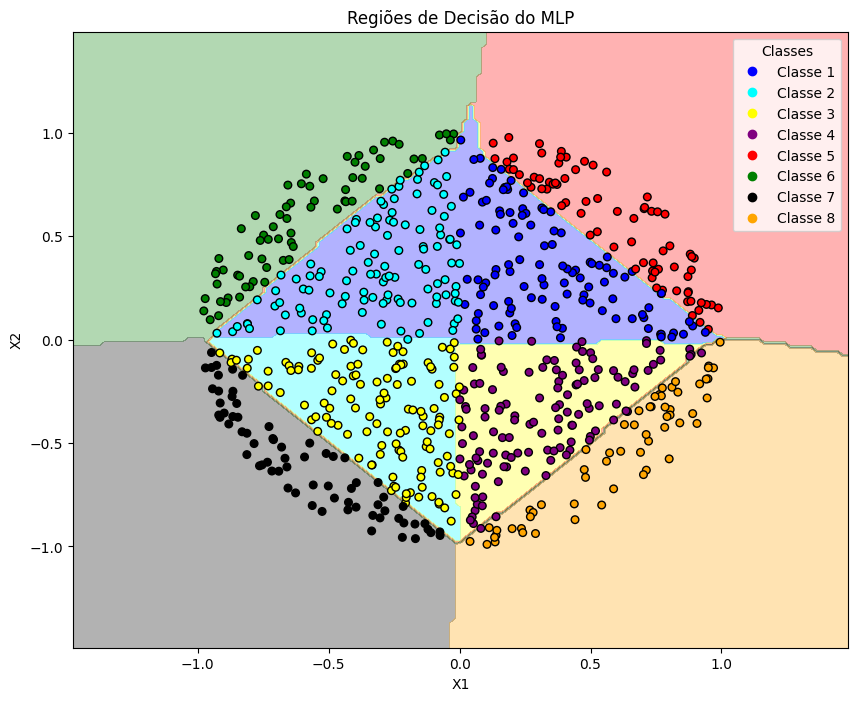

In [ ]:
# Plot decision regions para o conjunto de teste
plot_decision_regions(x_test, y_test.argmax(axis=1), model_2a)

In [ ]:
# Classification report
# Previsões no conjunto de teste
y_pred = model_2a.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

# Relatório de classificação
print(classification_report(np.argmax(y_test, axis=1), y_pred))

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       110
           1       1.00      0.97      0.98       115
           2       0.99      0.97      0.98       128
           3       0.98      0.94      0.96       124
           4       0.96      0.97      0.97        76
           5       0.96      1.00      0.98        69
           6       0.97      1.00      0.99        69
           7       0.94      1.00      0.97        59

    accuracy                           0.97       750
   macro avg       0.97      0.98      0.97       750
weighted avg       0.97      0.97      0.97       750



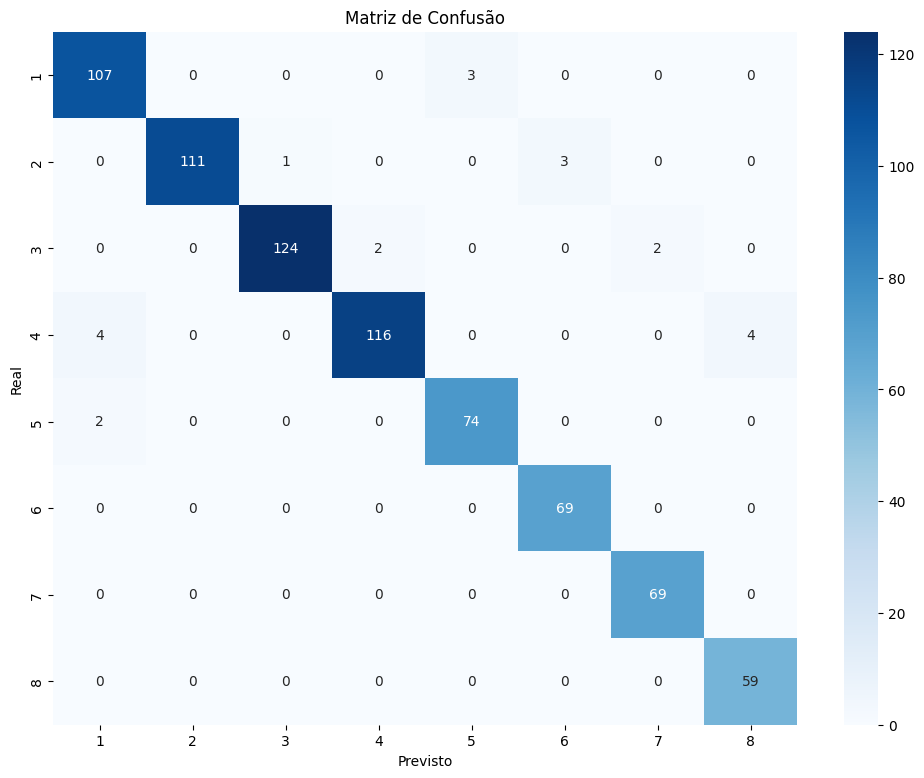

In [ ]:
# Matriz de confusão
# Calcula a matriz de confusão
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)

# Plot da matriz de confusão
plt.figure(figsize=(12, 9))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(1, 9), yticklabels=range(1, 9))
plt.title('Matriz de Confusão')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()

### Termo do momento

In [ ]:
# Definindo o model_2b

model_2b = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(2,)),          # Camada de entrada
    tf.keras.layers.Dense(8, activation='relu'),          # Camada oculta com 8 neurônios e ReLU
    tf.keras.layers.Dense(8, activation='softmax')         # Camada de saída com 8 neurônios e Softmax
])

# Escolhendo o otimizador Adam com uma learning rate de 0.001
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum = 0.9)

# Compilando o model_2b
model_2b.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Resumo do model_2b
model_2b.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 8)                   │              24 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 8)                   │              72 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 96 (384.00 B)

 Trainable params: 96 (384.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Definindo o batch_size
batch_size = 256  # Escolha comum para redes neurais, mas pode ser ajustado conforme necessário

epochs = 2000

# Treinando o model_2b
%time history = model_2b.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val, y_val))

Epoch 1/2000
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.1053 - loss: 2.1020 - val_accuracy: 0.1307 - val_loss: 2.0649
Epoch 2/2000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1218 - loss: 2.0580 - val_accuracy: 0.1520 - val_loss: 2.0091
Epoch 3/2000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1640 - loss: 1.9920 - val_accuracy: 0.2320 - val_loss: 1.9512
Epoch 4/2000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2694 - loss: 1.9349 - val_accuracy: 0.3213 - val_loss: 1.8913
Epoch 5/2000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3596 - loss: 1.8784 - val_accuracy: 0.3867 - val_loss: 1.8319
Epoch 6/2000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4156 - loss: 1.8203 - val_accuracy: 0.4440 - val_loss: 1.7718
Epoch 7/2000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4645 - loss: 1.7548 - val_accuracy: 0.4760 - val_loss: 1.7102
Epoch 8/2000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4952 - loss: 1.6878 - val_accuracy: 0

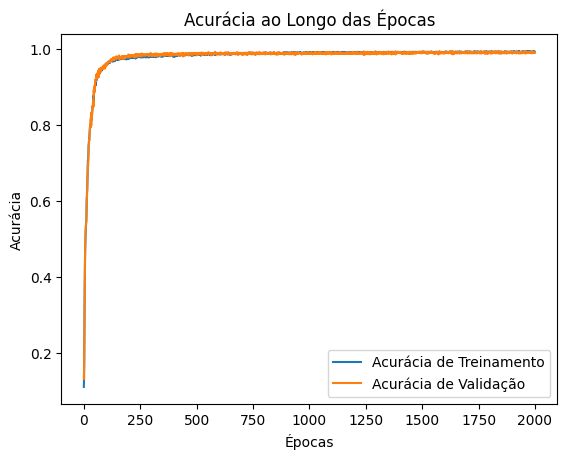

In [ ]:
# Plotando o erro de treino e validação
plt.plot(history.history['accuracy'], label='Acurácia de Treinamento')
plt.plot(history.history['val_accuracy'], label='Acurácia de Validação')
plt.title('Acurácia ao Longo das Épocas')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.show()

In [ ]:
# Avaliando o modelo no conjunto de teste
loss, accuracy = model_2b.evaluate(x_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9962 - loss: 0.0682 
Test Loss: 0.06255065649747849, Test Accuracy: 0.9946666955947876


699/699 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


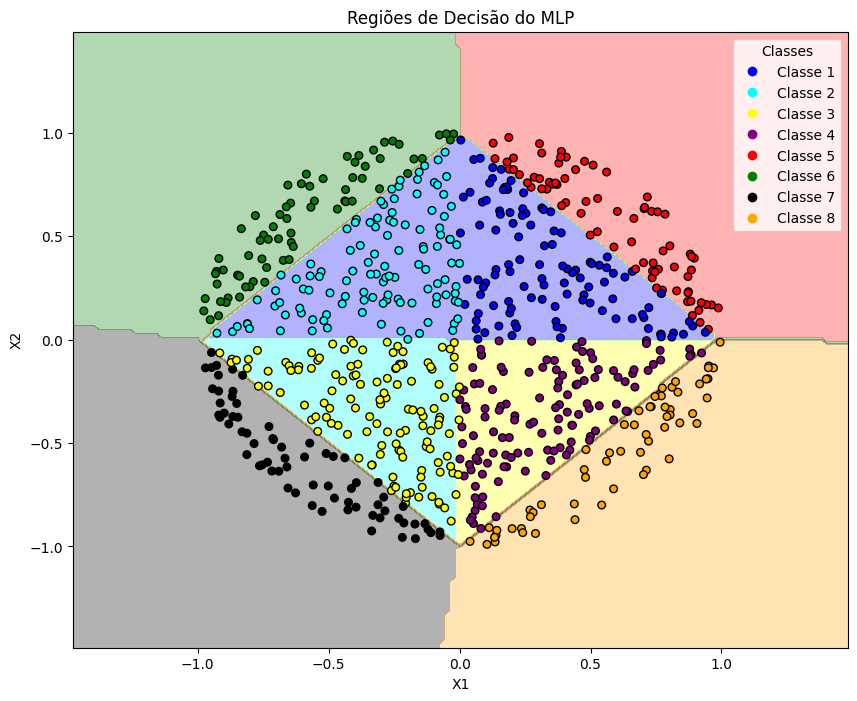

In [ ]:
# Plot decision regions para o conjunto de teste
plot_decision_regions(x_test, y_test.argmax(axis=1), model_2b)

In [ ]:
# CLassification report
# Previsões no conjunto de teste
y_pred = model_2b.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

# Relatório de classificação
print(classification_report(np.argmax(y_test, axis=1), y_pred))

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       110
           1       1.00      0.99      1.00       115
           2       0.99      1.00      1.00       128
           3       1.00      0.98      0.99       124
           4       1.00      0.99      0.99        76
           5       1.00      1.00      1.00        69
           6       1.00      1.00      1.00        69
           7       1.00      1.00      1.00        59

    accuracy                           0.99       750
   macro avg       1.00      1.00      1.00       750
weighted avg       0.99      0.99      0.99       750



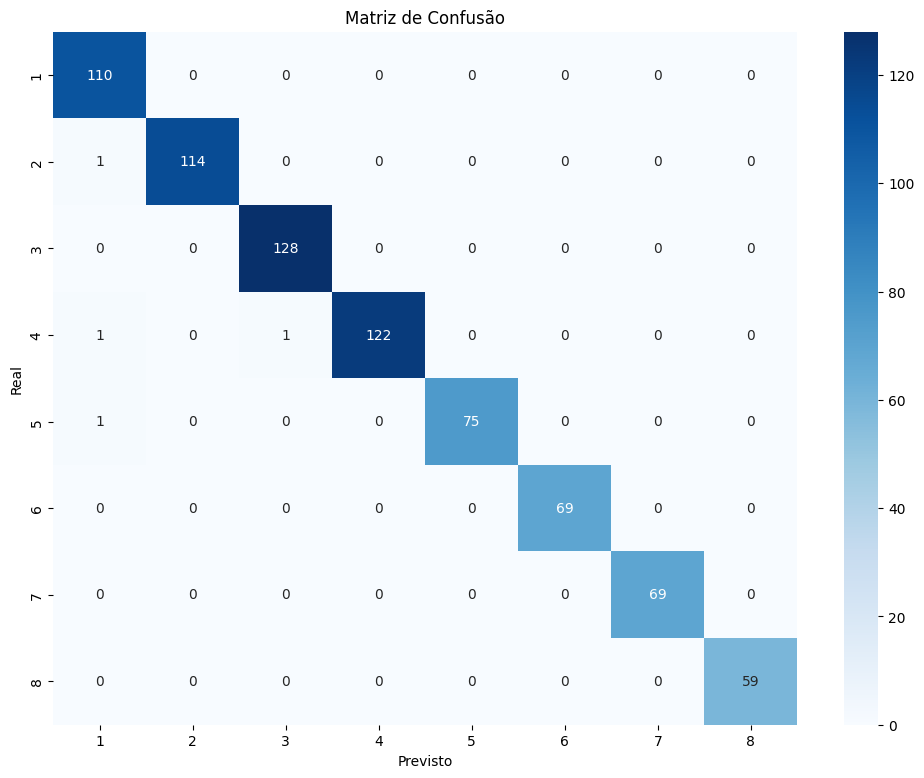

In [ ]:
# Matriz de confusão
# Calcula a matriz de confusão
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)

# Plot da matriz de confusão
plt.figure(figsize=(12, 9))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(1, 9), yticklabels=range(1, 9))
plt.title('Matriz de Confusão')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()

## $3)$ Utilize a rede neural perceptron de múltiplas camadas para fazer a predição de um passo, até predição de três passos, da série temporal: $y(n) = 2 \times sin(0.5\times n) + cos(1.5 \times n + (\pi/4)),\; para\; n \geq 0.$ Avalie o desempenho mostrando para cada caso os erros de predição.

## Para fazer a predição, estabeleça dois conjuntos de dados, um para o treinamento e outro para o teste. Nesse conjunto, cada amostra$/$exemplo pode ser construída utilizando como $K$ números anteriores da série como atributos de entrada $(y(n),\; y(n-1),\; y(n-2),\;...,\; y(n-K)),$ e a saída desejada seriam os próximos números da série $(y(n+1),\; y(n+2)\; e\; y(n+3)).$ Por exemplo, para $K = 10.$ Por exemplo:

* ### Exemplo de treinamento $1:$
** ### Entrada: $y(0),\; x(1),\; y(2),\;...,\; y(9)$
** ### Saída desejada: $y(10),\; y(11)\; e\; y(12)$

* ### Exemplo de treinamento $2:$
** ### Entrada: $y(1),\; y(2),\; y(3),\; ...,\; y(10)$
** ### Saída desejada: $y(11),\; y(12)\; e\; y(13)$

### $\;\;\;\; ...$

* ### Exemplo de treinamento $n:$
** ### Entrada: $y(20),\; y(21),\; y(22),\; ...,\; y(29)$
** ### Saída desejada: $y(30),\; y(31)\; e\; y(32)$

In [ ]:
def func_3(n):
    return np.array([2 * np.sin(0.5 * i) + np.cos(1.5 * i + np.pi/4) for i in range(n)]) #Retorna o array com os valores da função

In [ ]:
# Gerando a série temporal
n = 100
serie = func_3(n)
print(serie)

[ 0.70710678  0.30353436  0.88312465  2.53715301  2.69511437  0.77878633
 -0.65343815 -0.415783   -0.53749579 -2.10274922 -2.91485197 -1.40444213
  0.4391116   0.56478479  0.33506525  1.60296472  2.91899695  2.00303507
 -0.05859627 -0.68126139 -0.28032611 -1.11416121 -2.71641295 -2.49749152
 -0.46233628  0.7003573   0.34737285  0.70482637  2.34646098  2.8242056
  1.07035477 -0.57405089 -0.48521896 -0.423769   -1.87193631 -2.9438585
 -1.69326157  0.28058303  0.6276413   0.29192308  1.36796648  2.84803172
  2.25210708  0.17079066 -0.70578561 -0.29920781 -0.90884261 -2.56044618
 -2.6745864  -0.74058613  0.6612761   0.40699019  0.55512087  2.13261219
  2.90734985  1.36529331 -0.4574815  -0.55569892 -0.34328048 -1.63466616
 -2.92505024 -1.96790851  0.08691743  0.6762215   0.2797682   1.14302278
  2.73452726  2.47093981  0.42654854 -0.70304247 -0.34047704 -0.72703511
 -2.37339197 -2.80958776 -1.03109857  0.58677068  0.47573943  0.43702872
  1.90326683  2.94277016  1.6553851  -0.30381116 -0.6

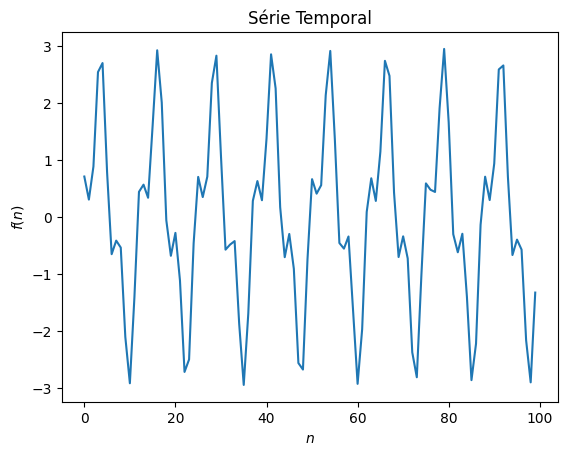

In [ ]:
# Plotando a série temporal
plt.plot(serie)
plt.title('Série Temporal')
plt.xlabel('$n$')
plt.ylabel('$f(n)$')
plt.show()

In [ ]:
def prepara_dados(series, K, num_steps):
    X = []
    y = []
    n = len(series)
    for i in range(K, n - num_steps + 1):  # Subtraí num_steps - 1 para garantir que sempre haverá elementos suficientes
        k_anteriores = series[i-K:i]  # Últimos K valores como entrada
        k_posteriores = series[i:i+num_steps]  # Próximos num_steps valores como saída
        X.append(k_anteriores)
        y.append(k_posteriores)
    return np.array(X), np.array(y)

In [ ]:
# Preparando os dados com K = 20
K = 3
num_steps = 2
X, y = prepara_dados(serie, K, num_steps)
print(X.shape)
print(y.shape)

(96, 3)
(96, 2)


In [ ]:
for i in range(4):
    print(X[i], '=>', y[i])

[0.70710678 0.30353436 0.88312465] => [2.53715301 2.69511437]
[0.30353436 0.88312465 2.53715301] => [2.69511437 0.77878633]
[0.88312465 2.53715301 2.69511437] => [ 0.77878633 -0.65343815]
[2.53715301 2.69511437 0.77878633] => [-0.65343815 -0.415783  ]


In [ ]:
print(serie)

[ 0.70710678  0.30353436  0.88312465  2.53715301  2.69511437  0.77878633
 -0.65343815 -0.415783   -0.53749579 -2.10274922 -2.91485197 -1.40444213
  0.4391116   0.56478479  0.33506525  1.60296472  2.91899695  2.00303507
 -0.05859627 -0.68126139 -0.28032611 -1.11416121 -2.71641295 -2.49749152
 -0.46233628  0.7003573   0.34737285  0.70482637  2.34646098  2.8242056
  1.07035477 -0.57405089 -0.48521896 -0.423769   -1.87193631 -2.9438585
 -1.69326157  0.28058303  0.6276413   0.29192308  1.36796648  2.84803172
  2.25210708  0.17079066 -0.70578561 -0.29920781 -0.90884261 -2.56044618
 -2.6745864  -0.74058613  0.6612761   0.40699019  0.55512087  2.13261219
  2.90734985  1.36529331 -0.4574815  -0.55569892 -0.34328048 -1.63466616
 -2.92505024 -1.96790851  0.08691743  0.6762215   0.2797682   1.14302278
  2.73452726  2.47093981  0.42654854 -0.70304247 -0.34047704 -0.72703511
 -2.37339197 -2.80958776 -1.03109857  0.58677068  0.47573943  0.43702872
  1.90326683  2.94277016  1.6553851  -0.30381116 -0.6

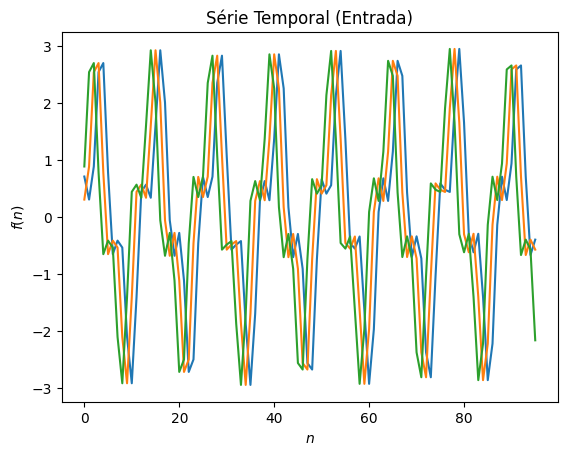

In [ ]:
plt.plot(X)
plt.title('Série Temporal (Entrada)')
plt.xlabel('$n$')
plt.ylabel('$f(n)$')
plt.show()

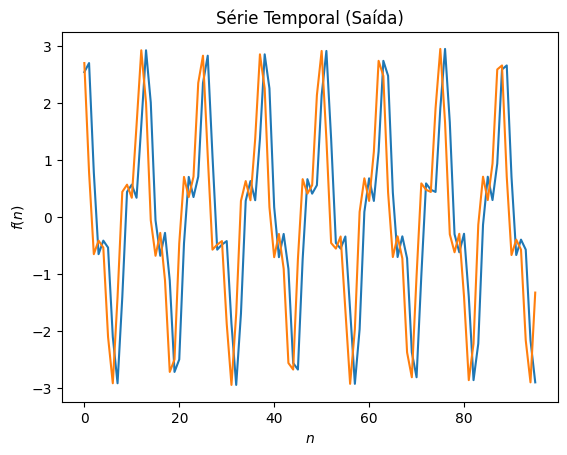

In [ ]:
plt.plot(y)
plt.title('Série Temporal (Saída)')
plt.xlabel('$n$')
plt.ylabel('$f(n)$')
plt.show()

In [ ]:
# 80% dos primeiros pontos para treino e 20% para teste e validação
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, shuffle=False)
# 50% dos pontos de teste para teste e 50% para validação
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=False)

print(" X_train shape", X_train.shape)
print(" X_val shape", X_val.shape)
print(" X_test shape", X_test.shape)

print(" y_train shape", y_train.shape)
print(" y_val shape", y_val.shape)
print(" y_test shape", y_test.shape)

 X_train shape (76, 3)
 X_val shape (10, 3)
 X_test shape (10, 3)
 y_train shape (76, 2)
 y_val shape (10, 2)
 y_test shape (10, 2)


In [ ]:
# Definindo o model_3

model_3 = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(K,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(num_steps)
])

# Escolhendo o otimizador Adam com uma learning rate de 0.001
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)

# Compilando o model_3
model_3.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

# Resumo do modelo
model_3.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 128)                 │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,898 (34.76 KB)

 Trainable params: 8,898 (34.76 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Definindo o batch_size e o número de épocas
batch_size = 32  # Tamanho comum, mas pode ser ajustado conforme necessário
epochs = 2000  # Escolha inicial de épocas; pode ser ajustado conforme a performance

In [ ]:
# Treinando o model_3
%time history = model_3.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val))

Epoch 1/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 151ms/step - loss: 2.5243 - mae: 1.2670 - val_loss: 2.9138 - val_mae: 1.3979
Epoch 2/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 2.4129 - mae: 1.2310 - val_loss: 2.8495 - val_mae: 1.3806
Epoch 3/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 2.4416 - mae: 1.2302 - val_loss: 2.7692 - val_mae: 1.3582
Epoch 4/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 2.3064 - mae: 1.1980 - val_loss: 2.6813 - val_mae: 1.3324
Epoch 5/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 2.4214 - mae: 1.2318 - val_loss: 2.5992 - val_mae: 1.3073
Epoch 6/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 2.3946 - mae: 1.2241 - val_loss: 2.5255 - val_mae: 1.2837
Epoch 7/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 2.3728 - mae: 1.2238 - val_loss: 2.4556 - val_mae: 1.2597
Epoch 8/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 2.1945 - mae: 1.1558 - val_loss: 2.3885 - val_mae: 1.2348
Epoch 9/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.91

In [ ]:
# Testando o modelo no conjunto de teste
loss, mae = model_3.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test MAE: {mae}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 5.3489e-04 - mae: 0.0164
Test Loss: 0.000534890394192189, Test MAE: 0.016370756551623344


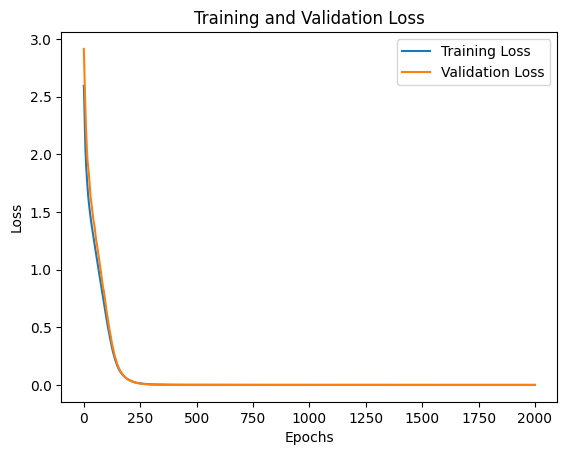

In [ ]:
# Plotando a perda do treinamento e validação ao longo das épocas
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

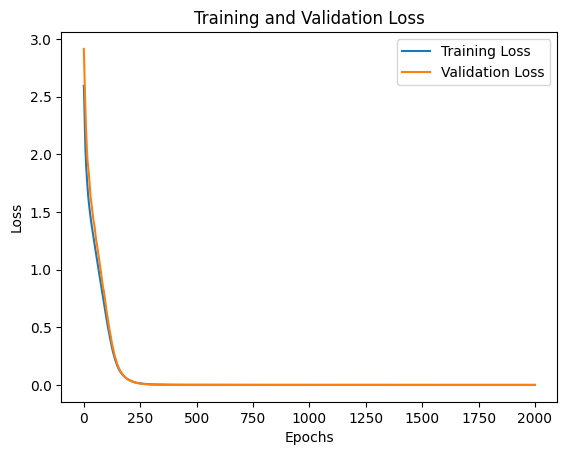

In [ ]:
# Plotando a perda do treinamento e validação ao longo das épocas
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Avaliando o modelo no conjunto de teste
test_loss, test_mae = model_3.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 5.3489e-04 - mae: 0.0164
Test Loss: 0.000534890394192189, Test MAE: 0.016370756551623344


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


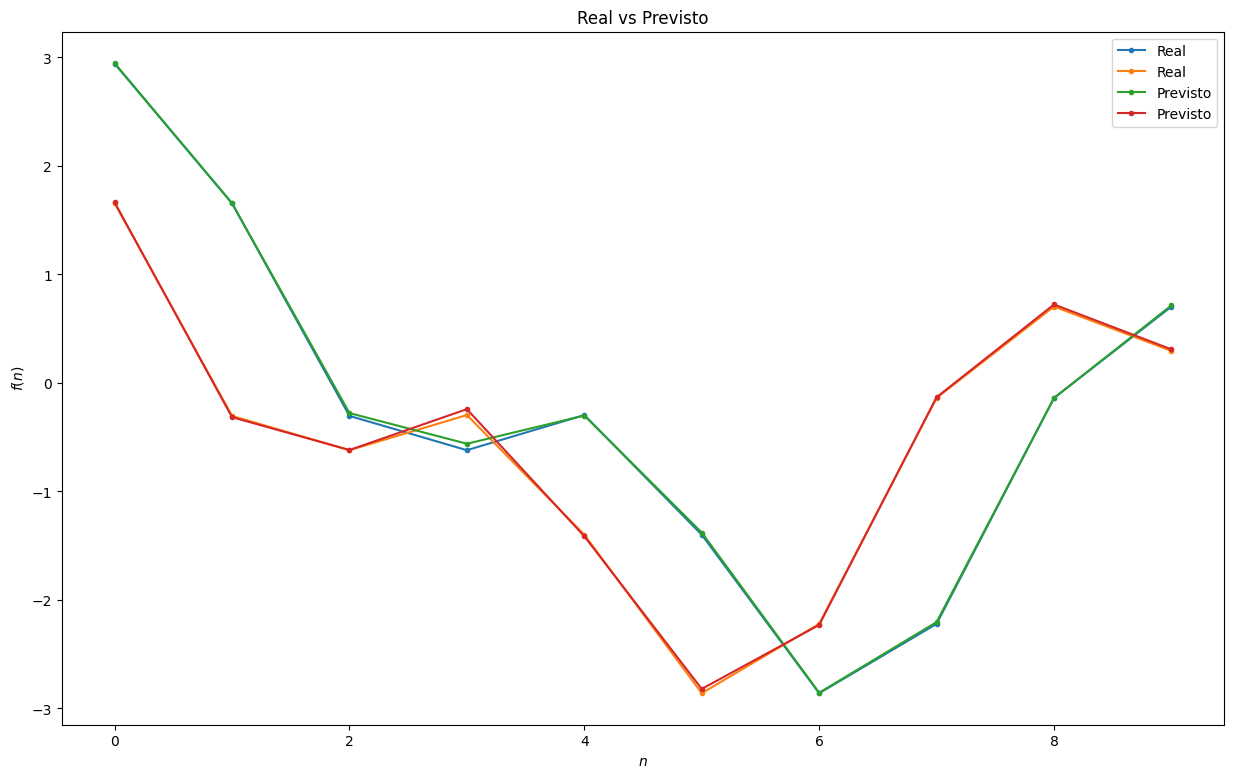

In [ ]:
# Previsões no conjunto de teste
y_pred = model_3.predict(X_test)

plt.figure(figsize=(15, 9))
plt.plot(y_test, label='Real',marker='.')
plt.plot(y_pred, label='Previsto', marker='.')
plt.title('Real vs Previsto')
plt.xlabel('$n$')
plt.ylabel('$f(n)$')
plt.legend()
plt.show()

## $4)$ Implemente uma Rede Perceptron de Múltiplas Camadas que faça a predição se um passageiro sobreviveu ou não ao acidente do Titanic. Embora houvesse algum elemento de sorte envolvido na sobrevivência dos envolvidos, aparentemente alguns grupos de pessoas tinham mais probabilidade de sobreviver do que outros. Neste exercício, você deve tentar criar um modelo preditivo, usando os dados de passageiros (ou seja, nome, idade, sexo, classe socioeconômica, etc.), que procure responder à pergunta: "que tipo de pessoa tem mais probabilidade de sobreviver?" A base de dados do problema pode ser acessada através do seguinte link: [https://www.kaggle.com/c/titanic/data](https://www.kaggle.com/c/titanic/data).

## Apresente também a curva do erro médio de treinamento com relação ao número de épocas e a curva do erro médio com o conjunto de validação ou teste. Calcule e apresente também a matriz de confusão do modelo.

## Dica: Analisem cuidadosamente a base de dados utilizada. Observem que alguns usuários possuem dados faltantes, inconsistentes, e algumas características (features) são redundantes. Dessa forma, a aplicação de técnicas de pré-processamento vistas nas nossas aulas pode ser importante para resolução do problema.

In [ ]:
df = pd.read_csv('train.csv')
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

**$1.$ PassengerId:** Um identificador único para cada passageiro.

**$2.$ Survived:** Indica se o passageiro sobreviveu $(1)$ ou não $(0).$

**$3.$ Pclass:** A classe do bilhete do passageiro, indicando a classe econômica $(1ª,\; 2ª\;$ ou $\; 3ª\; classe).$

**$4.$ Name:** O nome do passageiro.

**$5.$ Sex:** O gênero do passageiro, masculino ou feminino.

**$6.$ Age:** A idade do passageiro.

**$7.$ SibSp:** Número de irmãos/cônjuges a bordo.

**$8.$ Parch:** Número de pais/filhos a bordo.

**$9.$ Ticket:** Número do bilhete.

**$10.$ Fare:** Tarifa paga pelo passageiro.

**$11.$ Cabin:** Número da cabine.

**$12.$ Embarked:** O porto de embarcação (C = Cherbourg; Q = Queenstown; S = Southampton).

In [ ]:
# Preenchendo valores ausentes
df['Age'].fillna(df['Age'].median(), inplace=True) # Preenchendo com a mediana
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True) # Preenchendo com o valor mais comum
df['Fare'].fillna(df['Fare'].median(), inplace=True)  # Assumindo que 'Fare' também pode ter valores ausentes

# Opção para a coluna 'Cabin', se decidir mantê-la
df['Cabin'].fillna('Unknown', inplace=True)

df.loc[df['Age'] < 0, 'Age'] = df['Age'].median()  # Corrigindo idades negativas, se houver

### $Feature\; Enginnering$

In [ ]:
# Tamanho da família
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Extração de títulos a partir dos nomes dr. mr. mrs. etc
df['Title'] = df['Name'].apply(lambda name: name.split(',')[1].split('.')[0].strip())

# Indicador se o passageiro está sozinho
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

# Transformação logarítmica da tarifa (normalização)
df['LogFare'] = np.log(df['Fare'] + 1)

# Preencher valores faltantes da cabine com "U" de "Unknown"
df['Deck'] = df['Cabin'].apply(lambda x: x[0] if pd.notna(x) else 'U')

### $One\; Hot\; Encoding$

In [ ]:
# Codificação de 'Embarked' e 'Sex' usando get_dummies para transformação One-Hot
embarked_dummies = pd.get_dummies(df['Embarked'], prefix='Embarked')
sex_dummies = pd.get_dummies(df['Sex'], prefix='Sex')
#Para Title e Deck
title_dummies = pd.get_dummies(df['Title'], prefix='Title')
deck_dummies = pd.get_dummies(df['Deck'], prefix='Deck')

df = pd.concat([df, embarked_dummies, sex_dummies, title_dummies, deck_dummies], axis=1)

# Removendo as colunas originais após a codificação
df.drop(['Sex', 'Embarked', 'Name', 'Ticket', 'Cabin', 'Title', 'Fare', 'Sex_male', 'Deck'], axis=1, inplace=True)

df.head()

PassengerId  Survived  Pclass   Age  SibSp  Parch  FamilySize  IsAlone  \
0            1         0       3  22.0      1      0           2        0   
1            2         1       1  38.0      1      0           2        0   
2            3         1       3  26.0      0      0           1        1   
3            4         1       1  35.0      1      0           2        0   
4            5         0       3  35.0      0      0           1        1   

    LogFare  Embarked_C  ...  Title_the Countess  Deck_A  Deck_B  Deck_C  \
0  2.110213       False  ...               False   False   False   False   
1  4.280593        True  ...               False   False   False    True   
2  2.188856       False  ...               False   False   False   False   
3  3.990834       False  ...               False   False   False    True   
4  2.202765       False  ...               False   False   False   False   

   Deck_D  Deck_E  Deck_F  Deck_G  Deck_T  Deck_U  
0   False   False   False   False   False    True  
1   False   False   False   False   False   False  
2   False   False   False   False   False    True  
3   False   False   False   False   False   False  
4   False   False   False   False   False    True  

[5 rows x 39 columns]

In [ ]:
surv = pd.read_csv('gender_submission.csv')
df_test = pd.read_csv('test.csv')

surv_labels = []
for i in range(df_test.shape[0]):
  id = df_test['PassengerId'].values[i]

  surv_labels.append(surv[surv['PassengerId'] == id]['Survived'].values[0])
df_test['Survived'] = surv_labels

df_test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived'],
      dtype='object')

In [ ]:
# Limpeza de Dados
df_test['Age'].fillna(df_test['Age'].median(), inplace=True)
df_test['Embarked'].fillna(df_test['Embarked'].mode()[0], inplace=True)
df_test['Fare'].fillna(df_test['Fare'].median(), inplace=True)
df_test['Cabin'].fillna('Unknown', inplace=True)

df_test.drop_duplicates(inplace=True)

# Engenharia de Features
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1
df_test['Title'] = df_test['Name'].apply(lambda name: name.split(',')[1].split('.')[0].strip())
df_test['IsAlone'] = (df_test['FamilySize'] == 1).astype(int)
df_test['LogFare'] = np.log(df_test['Fare'] + 1)
df_test['Deck'] = df_test['Cabin'].apply(lambda x: x[0] if pd.notna(x) else 'U')

# Codificação de Variáveis Categóricas
embarked_dummies = pd.get_dummies(df_test['Embarked'], prefix='Embarked')
sex_dummies = pd.get_dummies(df_test['Sex'], prefix='Sex')
title_dummies = pd.get_dummies(df_test['Title'], prefix='Title')
deck_dummies = pd.get_dummies(df_test['Deck'], prefix='Deck')

df_test = pd.concat([df_test, embarked_dummies, sex_dummies, title_dummies, deck_dummies], axis=1)

# Removendo as colunas originais e outras não necessárias para o modelo após a codificação
df_test.drop(['Sex', 'Embarked', 'Name', 'Ticket', 'Cabin', 'Title', 'Fare', 'Sex_male', 'Deck'], axis=1, inplace=True)

# Checando os primeiros registros para confirmar as mudanças
df_test.head()

PassengerId  Pclass   Age  SibSp  Parch  Survived  FamilySize  IsAlone  \
0          892       3  34.5      0      0         0           1        1   
1          893       3  47.0      1      0         1           2        0   
2          894       2  62.0      0      0         0           1        1   
3          895       3  27.0      0      0         0           1        1   
4          896       3  22.0      1      1         1           3        0   

    LogFare  Embarked_C  ...  Title_Ms  Title_Rev  Deck_A  Deck_B  Deck_C  \
0  2.178064       False  ...     False      False   False   False   False   
1  2.079442       False  ...     False      False   False   False   False   
2  2.369075       False  ...     False      False   False   False   False   
3  2.268252       False  ...     False      False   False   False   False   
4  2.586824       False  ...     False      False   False   False   False   

   Deck_D  Deck_E  Deck_F  Deck_G  Deck_U  
0   False   False   False   False    True  
1   False   False   False   False    True  
2   False   False   False   False    True  
3   False   False   False   False    True  
4   False   False   False   False    True  

[5 rows x 30 columns]

In [ ]:
for column in df.columns:
    check = column in df_test.columns
    if(not check):
        print(column)

Title_Capt
Title_Don
Title_Jonkheer
Title_Lady
Title_Major
Title_Mlle
Title_Mme
Title_Sir
Title_the Countess
Deck_T


In [ ]:
for column in df_test.columns:
    check = column in df.columns
    if(not check):
        print(column)

Title_Dona


In [ ]:
df.drop(['PassengerId', 'Deck_T', 'Title_Capt', 'Title_Don', 'Title_Jonkheer', 'Title_Lady', 'Title_Major', 'Title_Mlle', 'Title_Mme', 'Title_Sir', 'Title_the Countess'], axis=1, inplace=True)
df_test.drop(['PassengerId', 'Title_Dona'], axis=1, inplace=True)

print('Colunas de df')
print(df.columns)
print('Colunas de df_test')
print(df_test.columns)

Colunas de df
Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'FamilySize', 'IsAlone',
       'LogFare', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Sex_female',
       'Title_Col', 'Title_Dr', 'Title_Master', 'Title_Miss', 'Title_Mr',
       'Title_Mrs', 'Title_Ms', 'Title_Rev', 'Deck_A', 'Deck_B', 'Deck_C',
       'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_U'],
      dtype='object')
Colunas de df_test
Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Survived', 'FamilySize', 'IsAlone',
       'LogFare', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Sex_female',
       'Title_Col', 'Title_Dr', 'Title_Master', 'Title_Miss', 'Title_Mr',
       'Title_Mrs', 'Title_Ms', 'Title_Rev', 'Deck_A', 'Deck_B', 'Deck_C',
       'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_U'],
      dtype='object')


In [ ]:
print(len(df.columns) == len(df_test.columns))
print(len(df.columns))

True
28


In [ ]:
categorical_columns = ['Embarked_C', 'Embarked_Q', 'Embarked_S', 'Sex_female', 'Title_Col', 'Title_Dr', 'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Ms', 'Title_Rev', 'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_U']
len(categorical_columns)

20

In [ ]:
label_encoder = LabelEncoder()

for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])
    df_test[column] = label_encoder.fit_transform(df_test[column])

In [ ]:
df[categorical_columns].head()

Embarked_C  Embarked_Q  Embarked_S  Sex_female  Title_Col  Title_Dr  \
0           0           0           1           0          0         0   
1           1           0           0           1          0         0   
2           0           0           1           1          0         0   
3           0           0           1           1          0         0   
4           0           0           1           0          0         0   

   Title_Master  Title_Miss  Title_Mr  Title_Mrs  Title_Ms  Title_Rev  Deck_A  \
0             0           0         1          0         0          0       0   
1             0           0         0          1         0          0       0   
2             0           1         0          0         0          0       0   
3             0           0         0          1         0          0       0   
4             0           0         1          0         0          0       0   

   Deck_B  Deck_C  Deck_D  Deck_E  Deck_F  Deck_G  Deck_U  
0       0       0       0       0       0       0       1  
1       0       1       0       0       0       0       0  
2       0       0       0       0       0       0       1  
3       0       1       0       0       0       0       0  
4       0       0       0       0       0       0       1

In [ ]:
df_test[categorical_columns].head()

Embarked_C  Embarked_Q  Embarked_S  Sex_female  Title_Col  Title_Dr  \
0           0           1           0           0          0         0   
1           0           0           1           1          0         0   
2           0           1           0           0          0         0   
3           0           0           1           0          0         0   
4           0           0           1           1          0         0   

   Title_Master  Title_Miss  Title_Mr  Title_Mrs  Title_Ms  Title_Rev  Deck_A  \
0             0           0         1          0         0          0       0   
1             0           0         0          1         0          0       0   
2             0           0         1          0         0          0       0   
3             0           0         1          0         0          0       0   
4             0           0         0          1         0          0       0   

   Deck_B  Deck_C  Deck_D  Deck_E  Deck_F  Deck_G  Deck_U  
0       0       0       0       0       0       0       1  
1       0       0       0       0       0       0       1  
2       0       0       0       0       0       0       1  
3       0       0       0       0       0       0       1  
4       0       0       0       0       0       0       1

### Modelagem, treino e resultados

In [ ]:
# Separando as features e a variável alvo
X_test = df_test.drop('Survived', axis=1)  # Remove a coluna 'Survived' para criar as features
y_test = df_test['Survived']  # Isola a coluna 'Survived' como a variável alvo


df = df.drop_duplicates()
X_train = df.drop('Survived', axis=1)
y_train = df['Survived']

print ("Shape dos treinos ")
print(X_train.shape)
print(y_train.shape)

print ("Shape dos testes ")
print(X_test.shape)
print(y_test.shape)

Shape dos treinos 
(786, 27)
(786,)
Shape dos testes 
(418, 27)
(418,)


In [ ]:
# Normalizando os dados de treino
x_train = scaler.fit_transform(X_train)
x_test = scaler.fit_transform(X_test)

print('Shapes')
print(x_train.shape)
print(x_test.shape)

Shapes
(786, 27)
(418, 27)


In [ ]:
# Assuming X_train and y_train are already prepared and available
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(15, input_dim=x_train.shape[1], kernel_initializer='uniform', activation='relu'),  # Input layer with number of features and ReLU activation
    tf.keras.layers.Dense(30, kernel_initializer = 'uniform', activation = 'relu'),
    tf.keras.layers.Dense(30, kernel_initializer = 'uniform', activation = 'relu'),
    tf.keras.layers.Dense(15, kernel_initializer = 'uniform', activation = 'relu'),
    tf.keras.layers.Dense(5, kernel_initializer = 'uniform', activation = 'relu'),
    tf.keras.layers.Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid')  # Output layer with sigmoid activation for binary classification
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.005)

model_4.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
model_4.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 15)                  │             420 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 30)                  │             480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 30)                  │             930 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 15)                  │             465 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 5)                   │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,381 (9.30 KB)

 Trainable params: 2,381 (9.30 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
early_stop = EarlyStopping(
    monitor='loss',
    min_delta=1e-5,
    patience=250,
    verbose=1,
    restore_best_weights=True,
    start_from_epoch=9000
)

In [ ]:
# Fit the model without early stopping
batch_size = 32
epochs = 10000

%time history = model_4.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1, validation_split=0, callbacks=[early_stop])

Streaming output truncated to the last 5000 lines.
Epoch 6846/10000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9341 - loss: 0.1409
Epoch 6847/10000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9286 - loss: 0.1401
Epoch 6848/10000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9235 - loss: 0.1590
Epoch 6849/10000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9141 - loss: 0.1971
Epoch 6850/10000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9079 - loss: 0.1796
Epoch 6851/10000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9246 - loss: 0.1772
Epoch 6852/10000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9318 - loss: 0.1539
Epoch 6853/10000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9250 - loss: 0.1620
Epoch 6854/10000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9068 - loss: 0.1681
Epoch 6855/10000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9216 - loss: 0.1690
Epoch 6856/10000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3m

In [ ]:
# Assuming X_test and y_test are prepared and available
loss, accuracy = model_4.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8021 - loss: 11.0904 
Test Accuracy: 80.86%


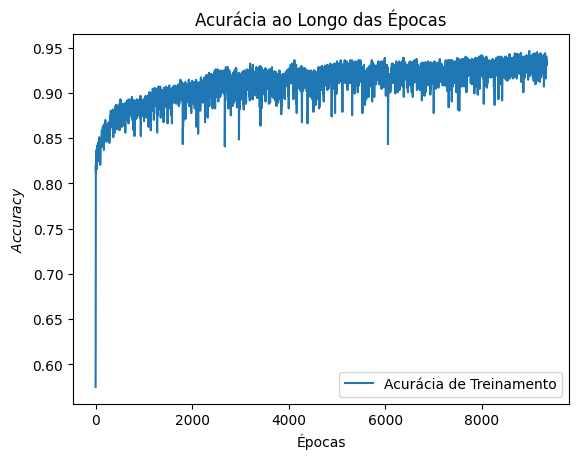

In [ ]:
#Plotando o erro de treino e validação
plt.plot(history.history['accuracy'], label='Acurácia de Treinamento')
plt.title('Acurácia ao Longo das Épocas')
plt.xlabel('Épocas')
plt.ylabel('$Accuracy$')
plt.legend()
plt.show()

In [ ]:
# Previsões no conjunto de teste
y_pred = model_4.predict(x_test)
print(y_pred.shape)

y_pred_b = []

for y in y_pred:
    if(y >= 0.5):
        y_pred_b.append(1)
    else:
        y_pred_b.append(0)

y_pred_b = np.array(y_pred_b)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
(418, 1)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
(418, 1)


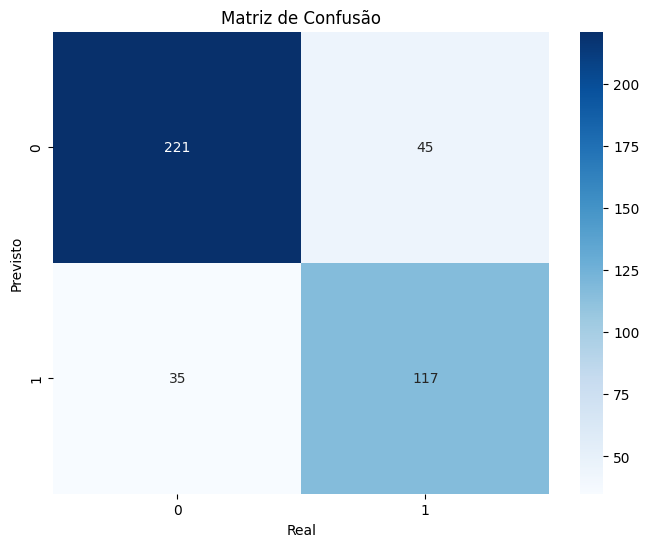

In [ ]:
# Previsões no conjunto de teste
y_pred = model_4.predict(x_test)
print(y_pred.shape)

# Matriz de confusão
# Calcula a matriz de confusão
cm = confusion_matrix(y_test, y_pred_b)

# Plot da matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão')
plt.ylabel('Previsto')
plt.xlabel('Real')
plt.show()

In [ ]:
df_test['Predicted'] = y_pred_b

# Contagem das labels preditas
label_counts = df_test['Predicted'].value_counts()
print("Contagem de Labels Preditivas:")
print(label_counts)

Contagem de Labels Preditivas:
Predicted
0    256
1    162
Name: count, dtype: int64


In [ ]:
metrics_dict = {
    'Pclass': 'mean',
    'Age': 'mean',
    'SibSp': 'mean',
    'Parch': 'mean',
    'FamilySize': 'mean',
    'IsAlone': 'sum',
    'LogFare': 'mean',
    'Sex_female': ['sum', 'mean'],
    'Embarked_C': ['sum', 'mean'],
    'Embarked_Q': ['sum', 'mean'],
    'Embarked_S': ['sum', 'mean'],
    'Title_Col': ['sum', 'mean'],
    'Title_Dr': ['sum', 'mean'],
    'Title_Master': ['sum', 'mean'],
    'Title_Miss': ['sum', 'mean'],
    'Title_Mr': ['sum', 'mean'],
    'Title_Mrs': ['sum', 'mean'],
    'Title_Ms': ['sum', 'mean'],
    'Title_Rev': ['sum', 'mean'],
    'Deck_A': ['sum', 'mean'],
    'Deck_B': ['sum', 'mean'],
    'Deck_C': ['sum', 'mean'],
    'Deck_D': ['sum', 'mean'],
    'Deck_E': ['sum', 'mean'],
    'Deck_F': ['sum', 'mean'],
    'Deck_G': ['sum', 'mean'],
    'Deck_U': ['sum', 'mean']
}

In [ ]:
# Métricas das features divididas por classe
grouped_stats = df_test.groupby('Predicted').agg(metrics_dict)
grouped_stats

Pclass        Age     SibSp     Parch FamilySize IsAlone  \
               mean       mean      mean      mean       mean     sum   
Predicted                                                               
0          2.507812  29.486328  0.425781  0.304688   1.730469     182   
1          1.882716  29.777778  0.481481  0.530864   2.012346      71   

            LogFare Sex_female           Embarked_C  ... Deck_D            \
               mean        sum      mean        sum  ...    sum      mean   
Predicted                                            ...                    
0          2.724646         35  0.136719         48  ...      3  0.011719   
1          3.474918        117  0.722222         54  ...     10  0.061728   

          Deck_E           Deck_F           Deck_G           Deck_U            
             sum      mean    sum      mean    sum      mean    sum      mean  
Predicted                                                                      
0              2  0.007812      5  0.019531      0  0.000000    228  0.890625  
1              7  0.043210      3  0.018519      1  0.006173     99  0.611111  

[2 rows x 47 columns]

In [ ]:
survived_classes_counts = df_test.groupby(['Predicted', 'Pclass', 'Sex_female']).size().unstack(fill_value=0)
survived_classes_counts

Sex_female          0   1
Predicted Pclass         
0         1        35   0
          2        55   1
          3       131  34
1         1        22  50
          2         8  29
          3        15  38

In [ ]:
y_pred_t = model_4.predict(x_train)
print(y_pred_t.shape)

y_pred_b = []

for y in y_pred_t:
    if(y >= 0.5):
        y_pred_b.append(1)
    else:
        y_pred_b.append(0)

y_pred_b = np.array(y_pred_b)
df['Predicted'] = y_pred_b

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
(786, 1)


In [ ]:
# Contagem das labels preditas
label_counts = df['Predicted'].value_counts()
print("Contagem de Labels Preditivas:")
print(label_counts)

Contagem de Labels Preditivas:
Predicted
0    481
1    305
Name: count, dtype: int64


In [ ]:
# Métricas das features divididas por classe
grouped_stats = df.groupby('Predicted').agg(metrics_dict)
grouped_stats

Pclass        Age     SibSp     Parch FamilySize IsAlone  \
               mean       mean      mean      mean       mean     sum   
Predicted                                                               
0          2.478170  30.558212  0.559252  0.374220   1.933472     311   
1          1.872131  28.117770  0.491803  0.485246   1.977049     135   

            LogFare Sex_female           Embarked_C  ... Deck_D            \
               mean        sum      mean        sum  ...    sum      mean   
Predicted                                            ...                    
0          2.780297         72  0.149688         70  ...      9  0.018711   
1          3.454395        224  0.734426         85  ...     24  0.078689   

          Deck_E           Deck_F           Deck_G           Deck_U            
             sum      mean    sum      mean    sum      mean    sum      mean  
Predicted                                                                      
0             10  0.020790      5  0.010395      2  0.004158    411  0.854470  
1             22  0.072131      8  0.026230      2  0.006557    172  0.563934  

[2 rows x 47 columns]

In [ ]:
survived_classes_counts = df.groupby(['Predicted', 'Pclass', 'Sex_female']).size().unstack(fill_value=0)
survived_classes_counts

Sex_female          0   1
Predicted Pclass         
0         1        80   3
          2        79   6
          3       250  63
1         1        41  90
          2        14  68
          3        26  66

### Outros Modelos
- XGBoost
- RandomForest

In [ ]:
'''#from sklearn.model_selection import train_test_split


# Carregar seu dataset
# Se já tem os dados preparados, use seu próprio dataset
# Exemplo: X, y = seus_dados, suas_classes

# Criar o DMatrix para o XGBoost
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)

# Definir os parâmetros do modelo
params = {
    'max_depth': 3,  # Profundidade máxima da árvore
    'eta': 0.1,  # Taxa de aprendizado
    'objective': 'binary:logistic',  # Objetivo para classificação binária
    'eval_metric': 'logloss',  # Métrica de avaliação
    'seed': 42  # Para reprodutibilidade
}

# Treinar o modelo
bst = xgb.train(params, dtrain, num_boost_round=100, evals=[(dtest, 'eval')], early_stopping_rounds=10)

# Fazer previsões
y_pred_prob = bst.predict(dtest)
y_pred = [1 if prob > 0.5 else 0 for prob in y_pred_prob]

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(cm)
print("Classification Report:")
print(cr)'''

'#from sklearn.model_selection import train_test_split\n\n\n# Carregar seu dataset\n# Se já tem os dados preparados, use seu próprio dataset\n# Exemplo: X, y = seus_dados, suas_classes\n\n# Criar o DMatrix para o XGBoost\ndtrain = xgb.DMatrix(x_train, label=y_train)\ndtest = xgb.DMatrix(x_test, label=y_test)\n\n# Definir os parâmetros do modelo\nparams = {\n    \'max_depth\': 3,  # Profundidade máxima da árvore\n    \'eta\': 0.1,  # Taxa de aprendizado\n    \'objective\': \'binary:logistic\',  # Objetivo para classificação binária\n    \'eval_metric\': \'logloss\',  # Métrica de avaliação\n    \'seed\': 42  # Para reprodutibilidade\n}\n\n# Treinar o modelo\nbst = xgb.train(params, dtrain, num_boost_round=100, evals=[(dtest, \'eval\')], early_stopping_rounds=10)\n\n# Fazer previsões\ny_pred_prob = bst.predict(dtest)\ny_pred = [1 if prob > 0.5 else 0 for prob in y_pred_prob]\n\n# Avaliar o modelo\naccuracy = accuracy_score(y_test, y_pred)\ncm = confusion_matrix(y_test, y_pred)\ncr = clas

In [ ]:
'''# Criar o modelo de Random Forest
rf_model = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)

# Treinar o modelo
rf_model.fit(x_train, y_train)

# Fazer previsões
y_pred = rf_model.predict(x_test)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(cm)
print("Classification Report:")
print(cr)'''

'# Criar o modelo de Random Forest\nrf_model = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)\n\n# Treinar o modelo\nrf_model.fit(x_train, y_train)\n\n# Fazer previsões\ny_pred = rf_model.predict(x_test)\n\n# Avaliar o modelo\naccuracy = accuracy_score(y_test, y_pred)\ncm = confusion_matrix(y_test, y_pred)\ncr = classification_report(y_test, y_pred)\n\nprint(f"Accuracy: {accuracy}")\nprint("Confusion Matrix:")\nprint(cm)\nprint("Classification Report:")\nprint(cr)'